<a href="https://colab.research.google.com/github/tahseenbt/Predicting-a-pulsar-star/blob/main/Final_project_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from sklearn import model_selection, neighbors, metrics, linear_model, ensemble, svm, impute, tree
import csv

In [2]:
!wget https://raw.githubusercontent.com/tahseenbt/Predicting-a-pulsar-star/main/data.csv

--2020-11-14 00:05:36--  https://raw.githubusercontent.com/tahseenbt/Predicting-a-pulsar-star/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1730114 (1.6M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.65M  1.30MB/s    in 1.3s    

2020-11-14 00:05:38 (1.30 MB/s) - ‘data.csv’ saved [1730114/1730114]



In [35]:
with open('data.csv') as csv_file:
  csv_reader = csv.reader(csv_file)
  data = list(csv_reader)
X = []
y = []
for d in data:
  X.append(list(map(float, d[:-1])))
  y.append(int(''.join(d[-1:])))
# test for no entries and fix it by placing the mean value there
# imp = impute.SimpleImputer(strategy='mean')
# imp.fit(X)
# print(imp.transform(X).tolist == X)

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, stratify=y)

KNN with n_neighbors=3 and other default parameters:
0.9799478519990067
0.975977653631285


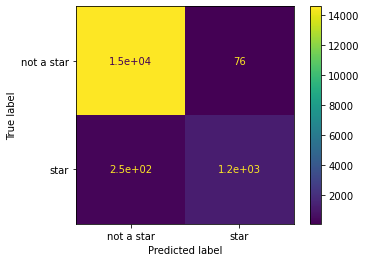

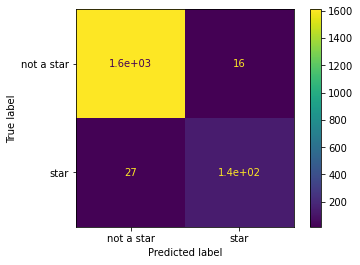

In [37]:
print("KNN with n_neighbors=3 and other default parameters:")
neigh = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(neigh, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(neigh, X_test, y_test, display_labels=["not a star", "star"])

finding KNN with the best hyperparameters:
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.8min finished


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
1.0
0.9770949720670391


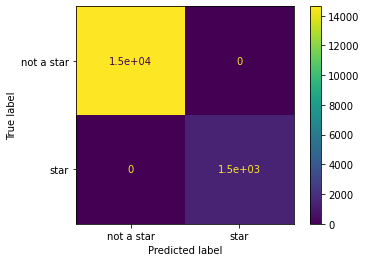

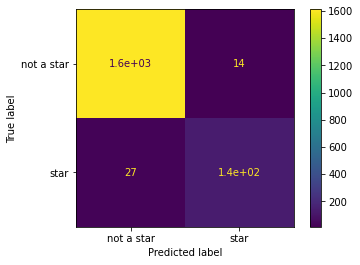

In [38]:
print("finding KNN with the best hyperparameters:")
neigh = neighbors.KNeighborsClassifier()
grid_params = {'n_neighbors': range(20), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
neigh = model_selection.GridSearchCV(neigh, grid_params, verbose=3, n_jobs=-1)
neigh.fit(X_train, y_train)
print(neigh.best_params_)
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(neigh, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(neigh, X_test, y_test, display_labels=["not a star", "star"])

before tuning Logistic Regression with default parameters:
0.979575366277626
0.9731843575418995
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1626
           1       0.95      0.74      0.84       164

    accuracy                           0.97      1790
   macro avg       0.96      0.87      0.91      1790
weighted avg       0.97      0.97      0.97      1790



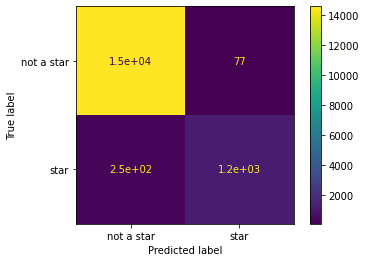

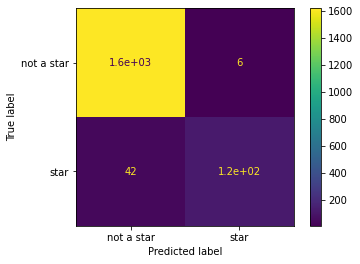

In [ ]:
print("Logistic Regression with default parameters:")
lr = linear_model.LogisticRegression(max_iter=len(X_train))
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(lr, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(lr, X_test, y_test, display_labels=["not a star", "star"])

finding logistic regression with the best hyperparameters:
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.9s finished


{'C': 46.41588833612782, 'penalty': 'l2'}
0.9796995281847529
0.9743016759776536
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1626
           1       0.95      0.76      0.84       164

    accuracy                           0.97      1790
   macro avg       0.96      0.88      0.91      1790
weighted avg       0.97      0.97      0.97      1790



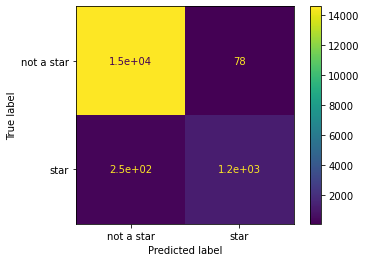

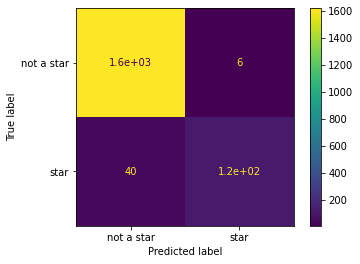

In [ ]:
print("finding logistic regression with the best hyperparameters:")
lr = linear_model.LogisticRegression(max_iter=len(X_train))
grid_params = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-5, 5, 10)}
lr = model_selection.GridSearchCV(lr, grid_params, verbose=3, n_jobs=-1)
lr.fit(X_train, y_train)
print(lr.best_params_)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(lr, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(lr, X_test, y_test, display_labels=["not a star", "star"])

before tuning RFC with default parameters:
1.0
0.9782122905027933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1626
           1       0.96      0.80      0.87       164

    accuracy                           0.98      1790
   macro avg       0.97      0.90      0.93      1790
weighted avg       0.98      0.98      0.98      1790



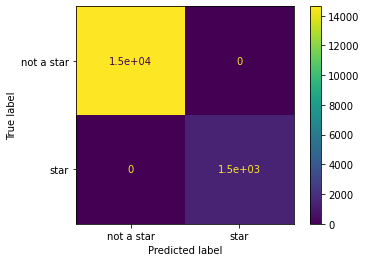

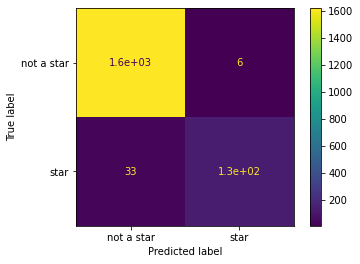

In [ ]:
print("RFC with default parameters:")
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(rfc, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(rfc, X_test, y_test, display_labels=["not a star", "star"])

finding RFC with the best hyperparameters:
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 51.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 55.1min finished


{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 600}
0.9898808045691582
0.9782122905027933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1626
           1       0.96      0.80      0.87       164

    accuracy                           0.98      1790
   macro avg       0.97      0.90      0.93      1790
weighted avg       0.98      0.98      0.98      1790



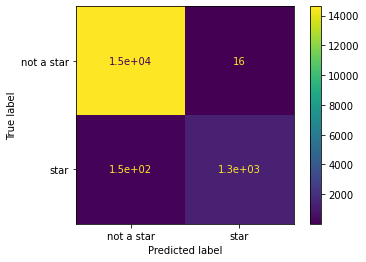

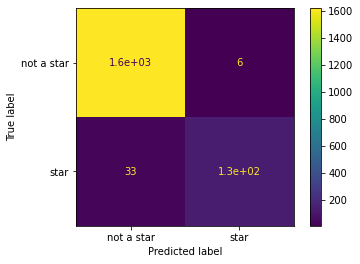

In [ ]:
print("finding RFC with the best hyperparameters:")
rfc = ensemble.RandomForestClassifier(n_estimators = 100)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
rfc = model_selection.GridSearchCV(rfc, grid_params, verbose=3, n_jobs=-1)
rfc.fit(X_train, y_train)
print(rfc.best_params_)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(rfc, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(rfc, X_test, y_test, display_labels=["not a star", "star"])

0.9734914328284082
0.9670391061452513


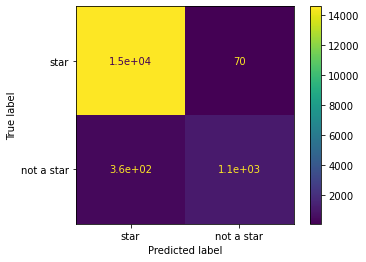

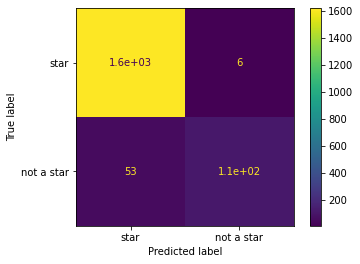

In [ ]:
print("SVM with default parameters:")
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(svm_clf, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(svm_clf, X_test, y_test, display_labels=["not a star", "star"])

SVM after hyperparameter tuning:
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 16.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9814377948845294
0.982122905027933


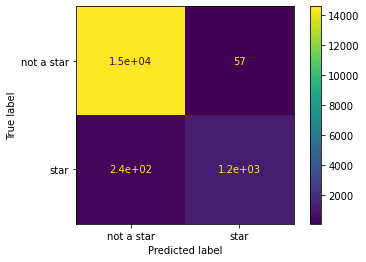

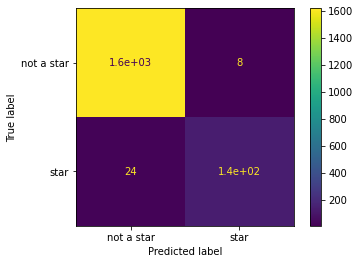

In [34]:
print("SVM after hyperparameter tuning:")
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
svm = svm.SVC()
svm = model_selection.GridSearchCV(svm, param_grid, verbose=3, n_jobs=-1)
svm.fit(X_train, y_train)
print(svm.best_params_)
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(svm, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(svm, X_test, y_test, display_labels=["not a star", "star"])

DTC with default hyperparameters:
1.0
0.9715083798882681
1790


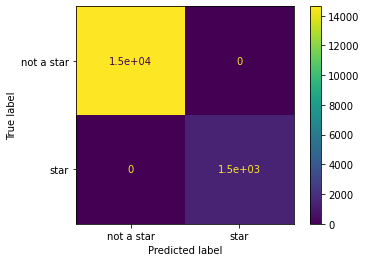

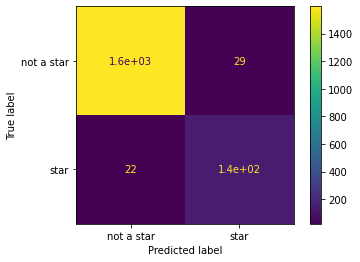

In [33]:
print("DTC with default hyperparameters:")
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(dtc, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(dtc, X_test, y_test, display_labels=["not a star", "star"])

DTC after hyperparameter tuning:
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 826 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 1394 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1617 out of 1620 | elapsed:  1.3min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.3min finished


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.981934442513037
0.9810055865921787


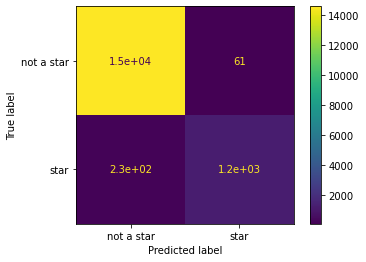

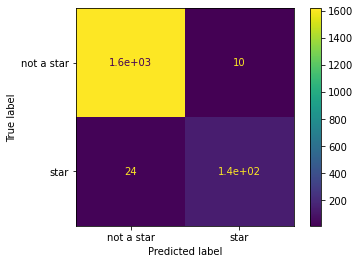

In [32]:
print("DTC after hyperparameter tuning:")
dtc = tree.DecisionTreeClassifier()
grid_params = {'criterion': ['gini'],
               'max_depth': range(1,10),
               'min_samples_split': range(1,10),
               'min_samples_leaf':range(1,5)
               }
dtc = model_selection.GridSearchCV(dtc, grid_params, verbose=3, n_jobs=-1)
dtc.fit(X_train, y_train)
print(dtc.best_params_)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(dtc, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(dtc, X_test, y_test, display_labels=["not a star", "star"])